In [1]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-zucq5a8v
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-zucq5a8v
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 554c6f13102fd81e129b644e604cc4051be7e6c0


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [3]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit import ClassicalRegister, QuantumRegister,QuantumCircuit,execute,Aer
# import basic plot tools
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_textbook.tools import simon_oracle

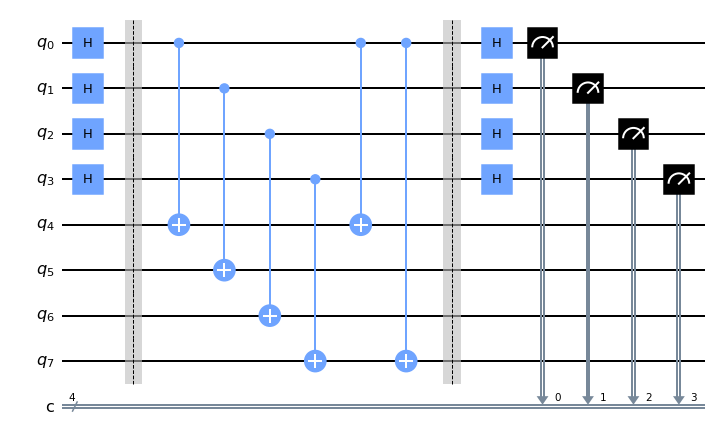

In [5]:
b = '1001'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit += simon_oracle(b)

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw('mpl')

/usr/local/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


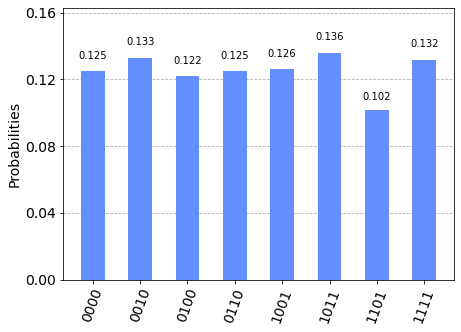

In [6]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [10]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

1001.1101 = 0 (mod 2)
1001.1001 = 0 (mod 2)
1001.0010 = 0 (mod 2)
1001.0000 = 0 (mod 2)
1001.1011 = 0 (mod 2)
1001.0110 = 0 (mod 2)
1001.0100 = 0 (mod 2)
1001.1111 = 0 (mod 2)
